<a href="https://colab.research.google.com/github/alicancode/DL-with-Python-Chapter-3-NN-examples/blob/main/Imdb_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification problem using imdb dataset
I'm currently studying out of Francois Challot's Deep Learning with Python [ISBN 9781617296864]
I followed the basic instructions he provided in the book.

If you have any suggestions, corrections, or advice as to how I can improve my skills please let me know. This is my first github upload.

Also if you have alot of experience in programming, lend some tips regarding how to get better at designing algo and problem solving in code. cheers!

In [1]:
import numpy as np
from keras.datasets import imdb #we are using the pre-included dataset in keras called 'imdb'
import pandas as pd

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)  #we are only taking 20pc of the actual 50k dataset

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(train_labels.shape)
print(train_data.shape)

(25000,)
(25000,)


Below is the vectorize_sequence function which converts our list of integer values into tensors as we cannot feed integer lists into a neural network

In [18]:
def vectorize_sequence(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test =  vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

our model has three layers, not counting the input layer.
If you are newer to keras or Neural Networks than I am, our activation function acts like a transformation. The output is fed into our next layer.

If this activation function is removed, then we are just doing some fancy, 1000 variable linear regression.

In [19]:
from keras import models
from keras import layers

model =  models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Creating our model
The optimizer is rmsprop, and our loss function is binary crossentropy.

You can use any valid loss/cost funtion but binary crossentropy is best for Binary Classification.

Binary Crossentropy is, in simple terms, a measure of the distance(error) between your truth(y_hat, training output) and your prediction(i.e f(x))


Splicing our training data into training and validation set.

In [20]:
x_val = x_train[:10000] #validation set
partial_x_train = x_train[10000:]#training set
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#checking their shape to be sure
print(x_val.shape)
print(partial_x_train.shape)
print(y_val.shape)
print(partial_y_train.shape)


(10000, 10000)
(15000, 10000)
(10000,)
(15000,)


In [53]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs  = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - acc: 0.9612 - loss: 0.1562 - val_acc: 0.8776 - val_loss: 0.3978
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - acc: 0.9873 - loss: 0.0667 - val_acc: 0.8775 - val_loss: 0.4002
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - acc: 0.9894 - loss: 0.0532 - val_acc: 0.8780 - val_loss: 0.3972
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - acc: 0.9937 - loss: 0.0339 - val_acc: 0.8749 - val_loss: 0.3912
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - acc: 0.9952 - loss: 0.0275 - val_acc: 0.8702 - val_loss: 0.4927
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - acc: 0.9915 - loss: 0.0333 - val_acc: 0.8746 - val_loss: 0.4363
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - acc: 0.9969 - loss: 0.0150 - val_acc: 0.8719 - val_loss: 0.5037
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - acc: 0.9954 - loss: 0.0166 - val_acc: 0.8739 - val_loss: 0.4774
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - acc: 0.99

# Plotting the training and validation loss

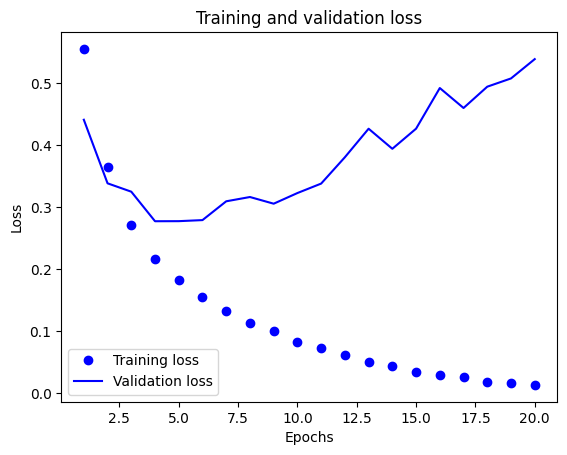

In [24]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo',label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy

In [52]:
plt.clf()
acc_values  = history_dict['acc']
val_acc_values  =history_dict['val_acc']

plt.plot(epochs, acc, 'red', label = 'training acc')
plt.plot(epochs, val_acc_values, 'yellow', label = 'validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

# Here I'm just messing around with the layers and number of nodes in each layer

In [46]:
model =  models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', loss = 'MeanSquaredError', metrics = ['accuracy'])
history = model.fit(partial_x_train, partial_y_train, epochs  = 20, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.6499 - loss: 0.2218 - val_accuracy: 0.7751 - val_loss: 0.1578
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.8677 - loss: 0.1185 - val_accuracy: 0.8815 - val_loss: 0.0970
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9000 - loss: 0.0838 - val_accuracy: 0.8815 - val_loss: 0.0896
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9185 - loss: 0.0669 - val_accuracy: 0.8787 - val_loss: 0.0897
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9273 - loss: 0.0608 - val_accuracy: 0.8879 - val_loss: 0.0836
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9422 - loss: 0.0494 - val_accuracy: 0.8794 - val_loss: 0.0882
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9483 - loss: 0.0452 - val_accuracy: 0.8870 - val_loss: 0.0843
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9563 - loss: 0.0379 - val_accuracy: 0.8792 -

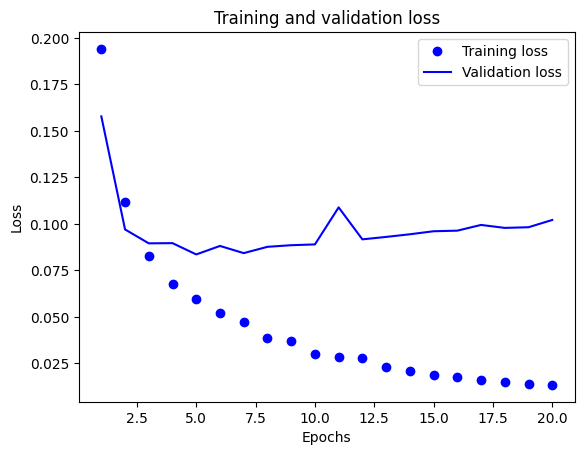

In [48]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo',label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

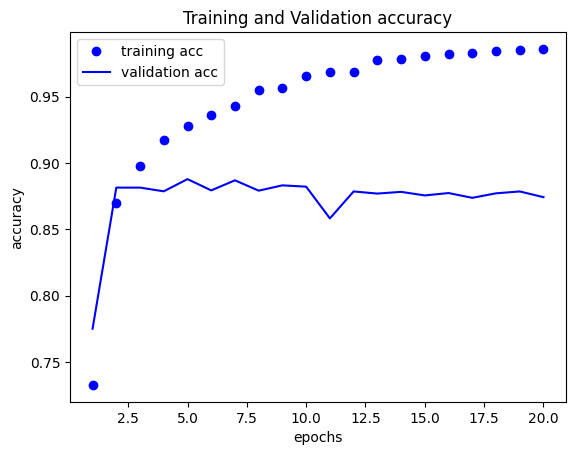

In [49]:
plt.clf()
acc_values  = history_dict['accuracy']
val_acc_values  =history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()